# Algoritmo genético para el problema TSP berin 52

In [ ]:
import pickle
import os
from distance_table import DistanceTable
import random
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
# Lo primero es cargar cargar el archivo que contiene los nodos y sus posiciones.

file_path = 'berlin52_tour_data.txt'
clean_lines = []
try:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            clean_lines.append(line.strip())
            print(line.strip()) # .strip() removes leading/trailing whitespace, including newline characters
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

NAME: berlin52
TYPE: TSP
COMMENT: 52 locations in Berlin (Groetschel)
DIMENSION: 52
EDGE_WEIGHT_TYPE: EUC_2D
NODE_COORD_SECTION
1 565.0 575.0
2 25.0 185.0
3 345.0 750.0
4 945.0 685.0
5 845.0 655.0
6 880.0 660.0
7 25.0 230.0
8 525.0 1000.0
9 580.0 1175.0
10 650.0 1130.0
11 1605.0 620.0
12 1220.0 580.0
13 1465.0 200.0
14 1530.0 5.0
15 845.0 680.0
16 725.0 370.0
17 145.0 665.0
18 415.0 635.0
19 510.0 875.0
20 560.0 365.0
21 300.0 465.0
22 520.0 585.0
23 480.0 415.0
24 835.0 625.0
25 975.0 580.0
26 1215.0 245.0
27 1320.0 315.0
28 1250.0 400.0
29 660.0 180.0
30 410.0 250.0
31 420.0 555.0
32 575.0 665.0
33 1150.0 1160.0
34 700.0 580.0
35 685.0 595.0
36 685.0 610.0
37 770.0 610.0
38 795.0 645.0
39 720.0 635.0
40 760.0 650.0
41 475.0 960.0
42 95.0 260.0
43 875.0 920.0
44 700.0 500.0
45 555.0 815.0
46 830.0 485.0
47 1170.0 65.0
48 830.0 610.0
49 605.0 625.0
50 595.0 360.0
51 1340.0 725.0
52 1740.0 245.0
EOF



In [3]:
# ahora para que sea más fácil el procesamiento y los cálculos del algoritmo
# primero es mejor hacer una matriz donde se guarda la distancia entre todos los puntos
# de tal forma que la intersección entre 2 nodos sea su distancia.  

# seleccionar solo los nodos del archivo
nodes = clean_lines[6:]
nodes = nodes[:52]
print(nodes)


['1 565.0 575.0', '2 25.0 185.0', '3 345.0 750.0', '4 945.0 685.0', '5 845.0 655.0', '6 880.0 660.0', '7 25.0 230.0', '8 525.0 1000.0', '9 580.0 1175.0', '10 650.0 1130.0', '11 1605.0 620.0', '12 1220.0 580.0', '13 1465.0 200.0', '14 1530.0 5.0', '15 845.0 680.0', '16 725.0 370.0', '17 145.0 665.0', '18 415.0 635.0', '19 510.0 875.0', '20 560.0 365.0', '21 300.0 465.0', '22 520.0 585.0', '23 480.0 415.0', '24 835.0 625.0', '25 975.0 580.0', '26 1215.0 245.0', '27 1320.0 315.0', '28 1250.0 400.0', '29 660.0 180.0', '30 410.0 250.0', '31 420.0 555.0', '32 575.0 665.0', '33 1150.0 1160.0', '34 700.0 580.0', '35 685.0 595.0', '36 685.0 610.0', '37 770.0 610.0', '38 795.0 645.0', '39 720.0 635.0', '40 760.0 650.0', '41 475.0 960.0', '42 95.0 260.0', '43 875.0 920.0', '44 700.0 500.0', '45 555.0 815.0', '46 830.0 485.0', '47 1170.0 65.0', '48 830.0 610.0', '49 605.0 625.0', '50 595.0 360.0', '51 1340.0 725.0', '52 1740.0 245.0']


In [4]:
# ahora crear la distance table en base a la lista de nodos la traemos de un archivo guardado si existe o sino 
# se instancia de nuevo

def load_or_create_distance_table(nodes, cache_file='distance_table.pkl'):
    if os.path.exists(cache_file):
        print(f"Cargando matriz de distancias desde {cache_file}")
        with open(cache_file, 'rb') as f:
            return pickle.load(f)
    else:
        print("Calculando matriz de distancias")
        distance_table = DistanceTable(nodes)
        print(f"Guardando matriz en {cache_file} para uso futuro")
        with open(cache_file, 'wb') as f:
            pickle.dump(distance_table, f)
        return distance_table

In [5]:
distance_table = load_or_create_distance_table(nodes)

nodes = distance_table.nodes

print("Cantidad de nodos: ", len(nodes))
for node in nodes:
    print(node)

Cargando matriz de distancias desde distance_table.pkl
Cantidad de nodos:  52
(1, 565.0, 575.0)
(2, 25.0, 185.0)
(3, 345.0, 750.0)
(4, 945.0, 685.0)
(5, 845.0, 655.0)
(6, 880.0, 660.0)
(7, 25.0, 230.0)
(8, 525.0, 1000.0)
(9, 580.0, 1175.0)
(10, 650.0, 1130.0)
(11, 1605.0, 620.0)
(12, 1220.0, 580.0)
(13, 1465.0, 200.0)
(14, 1530.0, 5.0)
(15, 845.0, 680.0)
(16, 725.0, 370.0)
(17, 145.0, 665.0)
(18, 415.0, 635.0)
(19, 510.0, 875.0)
(20, 560.0, 365.0)
(21, 300.0, 465.0)
(22, 520.0, 585.0)
(23, 480.0, 415.0)
(24, 835.0, 625.0)
(25, 975.0, 580.0)
(26, 1215.0, 245.0)
(27, 1320.0, 315.0)
(28, 1250.0, 400.0)
(29, 660.0, 180.0)
(30, 410.0, 250.0)
(31, 420.0, 555.0)
(32, 575.0, 665.0)
(33, 1150.0, 1160.0)
(34, 700.0, 580.0)
(35, 685.0, 595.0)
(36, 685.0, 610.0)
(37, 770.0, 610.0)
(38, 795.0, 645.0)
(39, 720.0, 635.0)
(40, 760.0, 650.0)
(41, 475.0, 960.0)
(42, 95.0, 260.0)
(43, 875.0, 920.0)
(44, 700.0, 500.0)
(45, 555.0, 815.0)
(46, 830.0, 485.0)
(47, 1170.0, 65.0)
(48, 830.0, 610.0)
(49, 605.0, 

In [6]:
#HELPERS

def route_distance(route, distance_table):
    dist = 0
    for i in range(len(route)):
        dist += distance_table.get_distance_by_index(route[i], route[(i+1) % len(route)])
    return dist

def fitness(route, distance_table):
    return 1 / route_distance(route, distance_table)


def initial_population(N, num_nodes):
    population = []
    for _ in range(N):
        route = list(range(num_nodes))
        random.shuffle(route)
        population.append(route)
    return population


def tournament_selection(population, distance_table, k=5):
    selected = random.sample(population, k)
    selected.sort(key=lambda r: route_distance(r, distance_table))
    return selected[0]


def order_crossover(parent1, parent2):
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))
    
    child = [-1] * n
    child[start:end] = parent1[start:end]
    
    pos = end
    for gene in parent2:
        if gene not in child:
            if pos >= n: pos = 0
            child[pos] = gene
            pos += 1
    return child


def swap_mutation(route):
    r = route[:]
    i, j = random.sample(range(len(route)), 2)
    r[i], r[j] = r[j], r[i]
    return r

def inversion_mutation(route):
    r = route[:]
    i, j = sorted(random.sample(range(len(route)), 2))
    r[i:j] = reversed(r[i:j])
    return r


In [ ]:
def genetic_algorithm(distance_table, N=200, maxIter=1000,
                      p_survivors=0.2, p_crossover=0.7, p_mutation=0.1,
                      visualize=True, save_gif=True, gif_name="tsp_evolution.gif"):
    
    num_nodes = len(distance_table.nodes)
    population = initial_population(N, num_nodes)
    
    best_route = None
    best_dist = float("inf")
    
    distance_history = []
    route_history = []  
    
    for gen in range(maxIter):
        population.sort(key=lambda r: route_distance(r, distance_table))
        current_best = population[0]
        current_dist = route_distance(current_best, distance_table)
        
        if current_dist < best_dist:
            best_route, best_dist = current_best, current_dist
        
        distance_history.append(best_dist)
        
        if gen % 20 == 0:
            route_history.append((gen, best_route[:], best_dist))
        
        survivors = population[:int(p_survivors * N)]
        children = []
        for _ in range(int(p_crossover * N)):
            p1, p2 = tournament_selection(population, distance_table), tournament_selection(population, distance_table)
            child = order_crossover(p1, p2)
            children.append(child)
        
        mutants = []
        for _ in range(int(p_mutation * N)):
            r = random.choice(population)
            if random.random() < 0.5:
                mutants.append(swap_mutation(r))
            else:
                mutants.append(inversion_mutation(r))
        
        population = survivors + children + mutants
        while len(population) < N:
            population.append(random.choice(population))
    
    if visualize:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        
        nodes = distance_table.nodes
        x = [nodes[i][1] for i in best_route] + [nodes[best_route[0]][1]]
        y = [nodes[i][2] for i in best_route] + [nodes[best_route[0]][2]]
        ax1.plot(x, y, 'b-', marker='o')
        ax1.set_title(f"Mejor Ruta - Distancia: {best_dist:.2f}")
        ax1.set_xlabel("X")
        ax1.set_ylabel("Y")
        
        ax2.plot(range(len(distance_history)), distance_history, 'r-', label="Distancia")
        ax2.set_title("Evolución de la Distancia")
        ax2.set_xlabel("Generaciones")
        ax2.set_ylabel("Distancia")
        ax2.legend()
        
        plt.show()
    
    if save_gif and route_history:
        fig, ax = plt.subplots(figsize=(6,6))
        
        def update(frame):
            ax.clear()
            gen, route, dist = route_history[frame]
            x = [nodes[i][1] for i in route] + [nodes[route[0]][1]]
            y = [nodes[i][2] for i in route] + [nodes[route[0]][2]]
            ax.plot(x, y, 'b-', marker='o')
            ax.set_title(f"Gen {gen} - Distancia: {dist:.2f}")
            ax.set_xlabel("X")
            ax.set_ylabel("Y")
        
        ani = animation.FuncAnimation(fig, update, frames=len(route_history), interval=300, repeat=False)
        ani.save(gif_name, writer='pillow')
        print(f"GIF guardado como {gif_name}")
    
    return best_route, best_dist


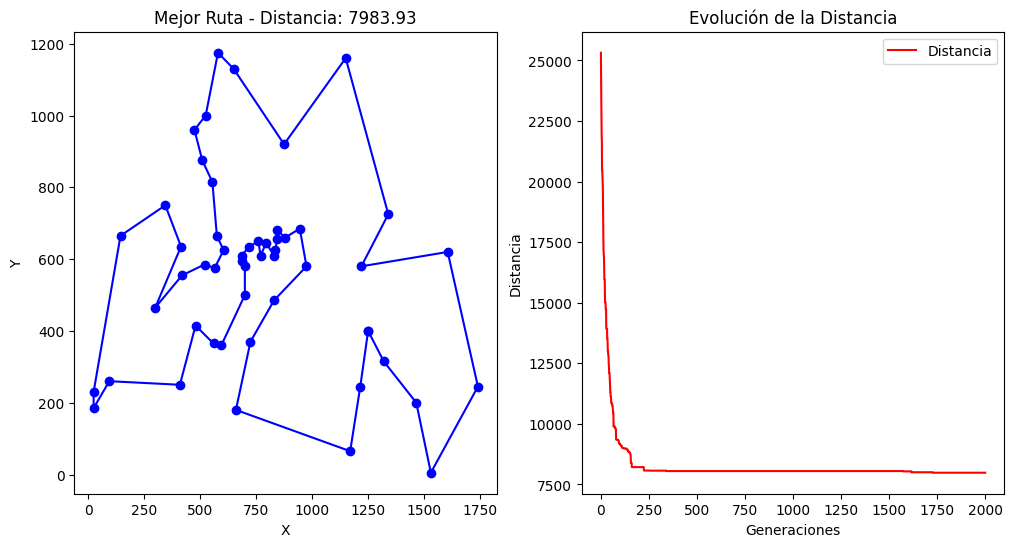

GIF guardado como tsp_berlin52.gif


In [14]:
best_route, best_dist = genetic_algorithm(distance_table,
                                          N=300,
                                          maxIter=2000,
                                          p_survivors=0.2,
                                          p_crossover=0.7,
                                          p_mutation=0.1,
                                          visualize=True,
                                          save_gif=True,
                                          gif_name="tsp_berlin52.gif")


In [15]:
print("Mejor ruta encontrada:", best_route)
print("Distancia total:", best_dist)

Mejor ruta encontrada: [27, 26, 12, 13, 51, 10, 11, 50, 32, 42, 9, 8, 7, 40, 18, 44, 31, 48, 0, 21, 30, 20, 17, 2, 16, 6, 1, 41, 29, 22, 19, 49, 43, 33, 34, 35, 38, 39, 36, 37, 47, 23, 4, 14, 5, 3, 24, 45, 15, 28, 46, 25]
Distancia total: 7983.929628195164
